# Import Package and Data

In [7]:
from code.ca_model import simulate_tumor_growth
from code.analyze import delay_coordinates_reconstruction
from code.read_data import read_history
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = "serif"     
rcParams['font.size']=12

In [8]:
GENERATIONS = 500
K1, K2 = 0.74, 0.2

In [9]:
history_csv_file = 'data/history_data.csv'
history_array = []
history_array = read_history(history_array, history_csv_file)

Importing completed, there are 100 history entries in total


## Behaviour of Number of Cancerous cells with increasing time-delay

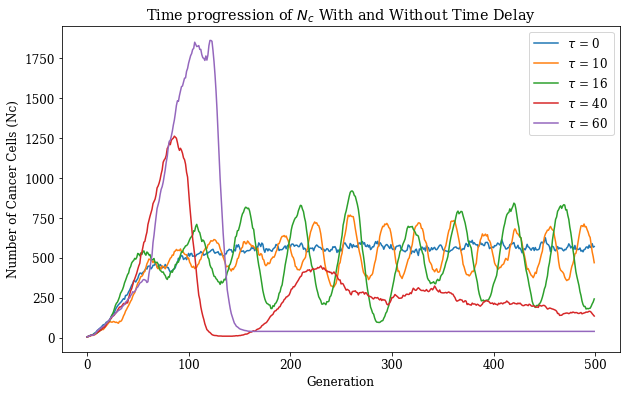

In [14]:
generations = list(range(GENERATIONS))
Nc_with_delay_10 = [int(history_array[10][g]['Nc']) for g in generations]
Nc_with_delay_16 = [int(history_array[16][g]['Nc']) for g in generations]
Nc_without_delay = [int(history_array[0][g]['Nc']) for g in generations]
Nc_with_delay_40 = [int(history_array[40][g]['Nc']) for g in generations]
Nc_with_delay_60 = [int(history_array[60][g]['Nc']) for g in generations]


plt.figure(figsize=(10, 6))
plt.plot(generations, Nc_without_delay, label=r'$\tau$ = 0')
plt.plot(generations, Nc_with_delay_10, label=r'$\tau$ = 10')
plt.plot(generations, Nc_with_delay_16, label=r'$\tau$ = 16')
plt.plot(generations, Nc_with_delay_40, label=r'$\tau$ = 40')
plt.plot(generations, Nc_with_delay_60, label=r'$\tau$ = 60')
plt.xlabel('Generation')
plt.ylabel('Number of Cancer Cells (Nc)')
plt.title(r'Time progression of $N_c$ With and Without Time Delay')
plt.legend()
plt.show()


## Delay-coordinate Reconstruction

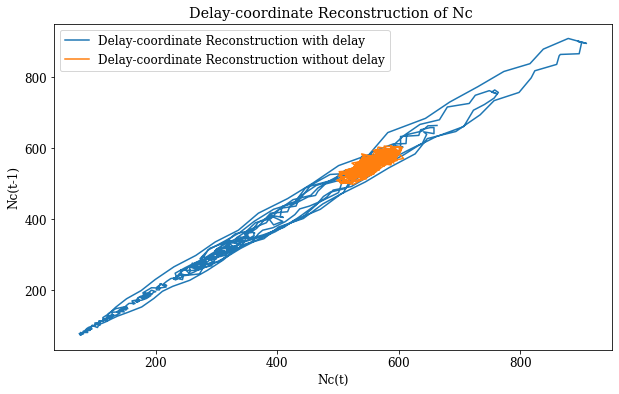

In [15]:
GENERATIONS = 1500

# time delay = 0
history_no_delay = simulate_tumor_growth(0, GENERATIONS, K1, K2)

# time delay = 20
history_delay = simulate_tumor_growth(20, GENERATIONS, K1, K2)

generations = list(range(GENERATIONS))
Nc_with_delay = [history_delay[g]['Nc'] for g in generations]
Nc_without_delay = [history_no_delay[g]['Nc'] for g in generations]

Nc_with_delay = Nc_with_delay[800:-1]
reconstructed_data_with_delay = delay_coordinates_reconstruction(Nc_with_delay, 1, 2)

Nc_without_delay = Nc_without_delay[800:-1]
reconstructed_data_without_delay = delay_coordinates_reconstruction(Nc_without_delay, 1, 2)

plt.figure(figsize=(10, 6))
plt.plot(reconstructed_data_with_delay[:, 1], reconstructed_data_with_delay[:, 0], label = "Delay-coordinate Reconstruction with delay")
plt.plot(reconstructed_data_without_delay[:, 1], reconstructed_data_without_delay[:, 0], label = "Delay-coordinate Reconstruction without delay")

plt.xlabel('Nc(t)')
plt.ylabel('Nc(t-1)')
plt.title('Delay-coordinate Reconstruction of Nc ')
plt.legend()
plt.show()

# 3D Plot for How Nc Increase during 500 Generations for Different Taus

In [15]:
# previous code
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

results = []
for tau in range(40):
    list_Nc = [history_array[g]['Nc'] for g in generations]
    results.append(list_Nc)
results = np.array(results)

tau_values, generation_values = np.meshgrid(time_delays, generations)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(tau_values, generation_values, results, cmap='viridis')
ax.set_xlabel('Tau')
ax.set_ylabel('Generations')
ax.set_zlabel('Nc')
plt.show()


TypeError: list indices must be integers or slices, not str